# <span style='font-family:"Times New Roman"'> <span styel=''> This code will extract important features using Random Forest technique from National Bridge Inventory (NBI) dataset.

## <span style='font-family:"Times New Roman"'> <span styel=''>Loading required modules: 

In [1]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <span style='font-family:"Times New Roman"'> <span styel=''>Turning off the warning about copying dataframe: 

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## <span style='font-family:"Times New Roman"'> <span styel=''>Reading NBI dataset and dropping culverts since we are interested in bridges: 

In [3]:
#Reading the dataset 
nbi = pd.read_csv('NBI 2019.txt', sep=',', engine='python').drop([0])
#Dropping Culverts  
nbi = nbi[nbi["CULVERT_COND_062"] == "N"].reset_index()

## <span style='font-family:"Times New Roman"'> <span styel=''>Setting `y` matrix to be target values we are interested: Deck condition, Superstructure condition, and Substructure condition: 

In [4]:
y = nbi[["DECK_COND_058","SUPERSTRUCTURE_COND_059","SUBSTRUCTURE_COND_060"]]

## <span style='font-family:"Times New Roman"'> <span styel=''>Setting up training matrix `x` and dropping features from dataset that are not necessary. This step is solely based on my Civil Engineering background: 

In [5]:
ini_df = nbi.drop(["ROUTE_NUMBER_005D","DIRECTION_005E","STRUCTURE_NUMBER_008",\
              "STATE_CODE_001","DECK_COND_058",\
              "SUPERSTRUCTURE_COND_059","SUBSTRUCTURE_COND_060",\
             "HIGHWAY_DISTRICT_002", "COUNTY_CODE_003","FEATURES_DESC_006A",\
             "PLACE_CODE_004","CRITICAL_FACILITY_006B","FACILITY_CARRIED_007","LOCATION_009",\
             "LRS_INV_ROUTE_013A","SUBROUTE_NO_013B",\
             "LAT_016","LONG_017","YEAR_ADT_030","RAILINGS_036A",\
             "TRANSITIONS_036B","APPR_RAIL_036C","APPR_RAIL_END_036D","HISTORY_037",\
             "NAVIGATION_038", "NAV_VERT_CLR_MT_039","NAV_HORR_CLR_MT_040",\
              "OPEN_CLOSED_POSTED_041", "LAT_UND_REF_055A", "LAT_UND_MT_055B","CHANNEL_COND_061",\
             "CULVERT_COND_062", "BRIDGE_IMP_COST_094","ROADWAY_IMP_COST_095",\
              "TOTAL_IMP_COST_096", "YEAR_OF_IMP_097","OTHER_STATE_CODE_098A",\
             "OTHER_STATE_PCNT_098B","OTHR_STATE_STRUC_NO_099","STRAHNET_HIGHWAY_100",\
             "PARALLEL_STRUCTURE_101","TEMP_STRUCTURE_103","HIGHWAY_SYSTEM_104","FEDERAL_LANDS_105",\
             "PERCENT_ADT_TRUCK_109","YEAR_OF_FUTURE_ADT_115","SUBMITTED_BY","FED_AGENCY"], axis=1)

#This line will transfer month and year to year value only since month would not be a suitable feature: 
for i in range (len(ini_df.DATE_OF_INSPECT_090)):
    ini_df.DATE_OF_INSPECT_090[i] = int(str(ini_df.DATE_OF_INSPECT_090[i])[-2:])+2000

ini_df.YEAR_BUILT_027 = 2019 - ini_df.YEAR_BUILT_027

ini_df.DATE_OF_INSPECT_090 = 2019 - ini_df.DATE_OF_INSPECT_090

#Filling NAN with zeros
ini_df = ini_df.fillna(0)
#One-hot encoding: 
x = pd.get_dummies(ini_df)
del x['index']
#x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x = pd.DataFrame(min_max_scaler.fit_transform(x.values), columns=x.columns, index=x.index)

## <span style='font-family:"Times New Roman"'> <span styel=''>Splitting test and train date: 30 percent would go to test and 70 percent would go to train:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

## <span style='font-family:"Times New Roman"'> <span styel=''>Feature selection using Random Forest: 

In [7]:
rf_tree = SelectFromModel(RandomForestClassifier(n_estimators = 100))
rf_tree.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [8]:
selected_features= X_train.columns[(rf_tree.get_support())]

In [9]:
print("Number of selected features :")
print(len(selected_features))

Number of selected features :
38


In [10]:
print("Selected features are :")
print(selected_features)

Selected features are :
Index(['ROUTE_PREFIX_005B', 'KILOPOINT_011', 'DETOUR_KILOS_019',
       'MAINTENANCE_021', 'OWNER_022', 'FUNCTIONAL_CLASS_026',
       'YEAR_BUILT_027', 'ADT_029', 'APPR_WIDTH_MT_032', 'DEGREES_SKEW_034',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'MAIN_UNIT_SPANS_045',
       'HORR_CLR_MT_047', 'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049',
       'ROADWAY_WIDTH_MT_051', 'DECK_WIDTH_MT_052', 'VERT_CLR_UND_054B',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'APPR_ROAD_EVAL_072',
       'WORK_PROPOSED_075A', 'WORK_DONE_BY_075B', 'IMP_LEN_MT_076',
       'DATE_OF_INSPECT_090', 'FUTURE_ADT_114', 'LOWEST_RATING', 'DECK_AREA',
       'STRUCTURAL_EVAL_067_4', 'STRUCTURAL_EVAL_067_5',
       'STRUCTURAL_EVAL_067_6', 'STRUCTURAL_EVAL_067_7',
       'STRUCTURAL_EVAL_067_8', 'DECK_PROTECTION_108C_1', 'BRIDGE_CONDITION_F',
       'BRIDGE_CONDITION_G', 'BRIDGE_CONDITION_P'],
      dtype='object')


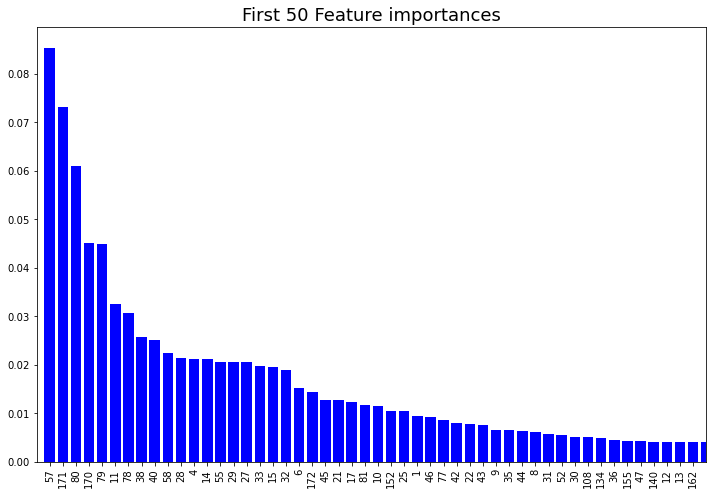

In [11]:
importances = rf_tree.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(12,8))
plt.title("First 50 Feature importances", fontsize=18)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(50), indices[0:50], rotation='vertical')
plt.xlim([-1, 50])
plt.show()